# Plot 2 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

% matplotlib inline

In [81]:
# for the top 20 stations, total turnstile counts by day of the week 
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

In [82]:
turnstiles = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

## Cleaning and Aggregating Data

In [83]:
# stripping trailing whitespaces - warning - takes forever!
turnstiles.columns = turnstiles.columns.str.strip()

In [84]:
turnstiles['DATETIME'] = turnstiles['DATE'] + ' ' + turnstiles['TIME']
turnstiles['DATETIME'] = turnstiles['DATETIME'].apply(parser.parse)

In [85]:
turnstiles['WEEKDAY'] = turnstiles['DATETIME'].apply(lambda x: x.weekday())

In [86]:
turnstiles

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00,5
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,2016-04-30 20:00:00,5
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,2016-05-01 00:00:00,6
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,2016-05-01 04:00:00,6
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,2016-05-01 08:00:00,6
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,2016-05-01 12:00:00,6


In [13]:
# thought: could we calculate the incremental difference between time periods FIRST - then sum up by dates? 
# similar to challenge structure
# then can go back and grab the time periods later

In [78]:
ts_group = turnstiles.groupby(['STATION','C/A','UNIT','SCP','DATE'])

In [79]:
ts_group

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00,5
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,2016-05-01 00:00:00,6
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,2016-05-01 04:00:00,6
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,2016-05-01 08:00:00,6
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,2016-05-01 12:00:00,6
10,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,16:00:00,REGULAR,5641329,1910508,2016-05-01 16:00:00,6


In [15]:
# isolating to first turnstile value of the day - warning - takes forever!
first = ts_group.min()

In [129]:
first.head()

LINENAME DIVISION      TIME     DESC  \
STATION C/A  UNIT SCP      DATE                                              
1 AV    H007 R248 00-00-00 04/30/2016        L      BMT  00:00:00  REGULAR   
                           05/01/2016        L      BMT  00:00:00  REGULAR   
                           05/02/2016        L      BMT  00:00:00  REGULAR   
                           05/03/2016        L      BMT  00:00:00  REGULAR   
                           05/04/2016        L      BMT  00:00:00  REGULAR   

                                        ENTRIES     EXITS   DATETIME  WEEKDAY  
STATION C/A  UNIT SCP      DATE                                                
1 AV    H007 R248 00-00-00 04/30/2016  11020304  12018000 2016-04-30        5  
                           05/01/2016  11023576  12022156 2016-05-01        6  
                           05/02/2016  11026020  12025254 2016-05-02        0  
                           05/03/2016  11030595  12029273 2016-05-03        1  
                           05/04/2016  11035215  12033296 2016-05-04        2

In [16]:
# reset the index
second = first.reset_index()

In [17]:
# take the incremental difference between dates
second['INCREM_ENTRIES'] = second['ENTRIES'].diff(periods=-1).abs()
second['INCREM_EXITS'] = second['EXITS'].diff(periods=-1).abs()
second['TOTAL'] = second['INCREM_ENTRIES'] + second['INCREM_EXITS']

In [18]:
# remove the station-c/a-unit-scp with the date 5/27/2016
third = second[second['DATE'] != '05/27/2016']

In [103]:
# If we sort by the total, we see that there are a good number of extreme values
third.sort_values(by = 'TOTAL', ascending = False)

,STATION,C/A,UNIT,SCP,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,INCREM_ENTRIES,INCREM_EXITS,TOTAL
29931,47-50 STS ROCK,N501,R020,01-03-02,05/04/2016,BDFM,IND,00:00:00,REGULAR,15063508,12532464,2016-05-04 00:00:00,2,1.906774e+09,2.022962e+09,3.929736e+09
62639,CANAL ST,A066,R118,00-00-00,05/20/2016,JNQRZ6,BMT,06:34:07,RECOVR AUD,10067101,6913428,2016-05-20 06:34:07,4,1.717960e+09,1.754729e+09,3.472689e+09
18617,28 ST,R228,R143,00-00-01,05/11/2016,6,IRT,01:00:00,RECOVR AUD,2148048,3755328,2016-05-11 01:00:00,2,1.424902e+09,1.876059e+09,3.300961e+09
18616,28 ST,R228,R143,00-00-01,05/10/2016,6,IRT,01:00:00,REGULAR,1427045583,1879810832,2016-05-10 01:00:00,1,1.424898e+09,1.876056e+09,3.300953e+09
22988,34 ST-PENN STA,N067,R012,00-00-05,05/21/2016,ACE,IND,00:00:00,REGULAR,800597,785630,2016-05-21 00:00:00,5,1.963408e+09,4.861475e+08,2.449556e+09
22991,34 ST-PENN STA,N067,R012,00-03-00,05/02/2016,ACE,IND,00:00:00,REGULAR,1964211412,486934222,2016-05-02 00:00:00,0,1.961786e+09,4.869341e+08,2.448720e+09
62694,CANAL ST,A066,R118,00-00-02,05/21/2016,JNQRZ6,BMT,01:00:00,REGULAR,18129337,7988274,2016-05-21 01:00:00,5,3.175086e+08,2.022117e+09,2.339625e+09
86247,GRD CNTRL-42 ST,R238A,R046,02-00-03,05/22/2016,4567S,IRT,00:00:00,REGULAR,1878206997,134764147,2016-05-22 00:00:00,6,1.609771e+09,5.422860e+05,1.610313e+09
58477,BOWLING GREEN,R200A,R041,01-05-00,05/08/2016,45,IRT,00:00:00,REGULAR,2224,0,2016-05-08 00:00:00,6,1.289812e+09,1.532232e+08,1.443035e+09
57028,BEVERLY RD,R641,R210,00-06-00,05/15/2016,25,IRT,00:00:00,REGULAR,1210361,4085702,2016-05-15 00:00:00,6,3.007874e+08,1.036114e+09,1.336901e+09


In [107]:
# based on quick and dirty look at data, cut off individual turnstiles with a max of 100,000. 
# Use copy to have df change in place
fourth = third[third['TOTAL']<100000].copy()

In [121]:
# now we want to average the entries by station, by weekday
# note that this calculates the average BY TURNSTILE - haven't quite figured out how to best average by station
fifth = fourth.groupby(['STATION','WEEKDAY']).mean()[['INCREM_ENTRIES','INCREM_EXITS', 'TOTAL']]

In [122]:
# resetting the index
sixth = fifth.reset_index()

In [123]:
# borrowing list of top stations from Plot 1 (probably want to do this less manually)
l = ['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 '86 ST',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH']

In [124]:
# creating a new dataframe just for the stations we are interested in
seventh = sixth[sixth['STATION'].isin(l)].copy()

In [125]:
seventh

,STATION,WEEKDAY,INCREM_ENTRIES,INCREM_EXITS,TOTAL
98,14 ST-UNION SQ,0,2791.480263,2358.203947,5149.684211
99,14 ST-UNION SQ,1,2883.973684,2437.578947,5321.552632
100,14 ST-UNION SQ,2,3019.855263,2557.032895,5576.888158
101,14 ST-UNION SQ,3,2998.861842,2534.355263,5533.217105
102,14 ST-UNION SQ,4,2972.307018,2569.684211,5541.991228
103,14 ST-UNION SQ,5,2095.006579,1887.907895,3982.914474
104,14 ST-UNION SQ,6,1531.921053,1379.500000,2911.421053
322,23 ST,0,1820.024735,1362.240283,3182.265018
323,23 ST,1,1923.187279,1430.607774,3353.795053
324,23 ST,2,1945.659574,1438.500000,3384.159574


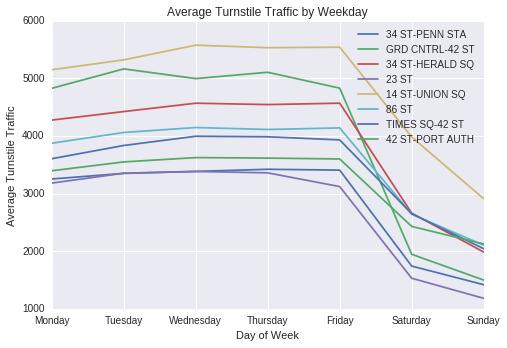

In [128]:
# for each station, plot the traffic by weekday
fig = plt.figure()

x = range(0,7)
axes = fig.add_axes([0, 0, 1, 1])

for station in l:
    y = seventh[seventh['STATION'] == station]['TOTAL']
    axes.plot(x, y, label = station)

axes.set_xlabel('Day of Week') # Notice the use of set_ to begin methods
axes.set_ylabel('Average Turnstile Traffic')
axes.set_title('Average Turnstile Traffic by Weekday')
axes.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes.legend();